<a href="https://colab.research.google.com/github/OWL-408/CIT2024/blob/main/%E6%B3%A2%E5%BD%A2%E5%88%86%E9%A1%9E%E7%94%9F%E6%88%90%E3%83%A2%E3%83%87%E3%83%ABVer_1%E5%AE%8C%E6%88%90%E7%89%88.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

TS/uEl出力

In [ ]:
import numpy as np
import pandas as pd
import os

# TS（最大応力）とuEL（その時のひずみ）を計算する関数
def calculate_ts_and_uel(df):
    x = df['Nominal strain'].values
    y = df['Nominal stress'].values

    if len(x) < 2 or len(y) < 2:
        raise ValueError("Insufficient data points for analysis.")

    max_stress_idx = np.argmax(y)
    TS = y[max_stress_idx]
    uEL = x[max_stress_idx]

    return TS, uEL

# データフォルダ内のすべてのCSVファイルを処理する関数
def process_all_files(data_folder):
    results = []
    for filename in os.listdir(data_folder):
        if filename.endswith('.csv'):
            filepath = os.path.join(data_folder, filename)
            try:  # ファイル読み込みエラーを捕捉
                df = pd.read_csv(filepath)
                print(f"Columns in {filename}: {df.columns}")

                if 'Nominal strain' not in df.columns or 'Nominal stress' not in df.columns:
                    raise KeyError(f"'Nominal strain' or 'Nominal stress' not found in {filename}")

                df = df.dropna()
                if df.empty: # 空のDataFrameの場合スキップ
                    print(f"Warning: {filename} is empty after dropping NaN values.")
                    continue
                TS, uEL = calculate_ts_and_uel(df)
                results.append((filename, TS, uEL))
            except pd.errors.EmptyDataError:
                print(f"Warning: {filename} is empty.")
            except FileNotFoundError:
                print(f"Error: File not found: {filepath}")
            except pd.errors.ParserError:
                print(f"Error: Could not parse CSV file: {filepath}")

    return results

# メイン関数
def main():
    data_folder = '/content/drive/MyDrive/program/TS-uEL'
    results = process_all_files(data_folder)

    # 結果を格納するDataFrameを作成
    results_df = pd.DataFrame(results, columns=['filename', 'TS', 'uEL'])

    # ファイル名で昇順にソート
    results_df = results_df.sort_values('filename')

    # 結果を表示
    print(results_df)

    # CSVファイルへの出力
    results_df.to_csv('results_ts-uEl.csv', index=False)

if __name__ == "__main__":
    main()

Columns in B.csv: Index(['Nominal strain', 'Nominal stress'], dtype='object')
Columns in F.csv: Index(['Nominal strain', 'Nominal stress'], dtype='object')
Columns in M.csv: Index(['Nominal strain', 'Nominal stress'], dtype='object')
Columns in F-P.csv: Index(['Nominal strain', 'Nominal stress'], dtype='object')
Columns in B鋼_2.csv: Index(['Nominal strain', 'Nominal stress'], dtype='object')
Columns in F+P鋼_2.csv: Index(['Nominal strain', 'Nominal stress'], dtype='object')
Columns in F鋼_2.csv: Index(['Nominal strain', 'Nominal stress'], dtype='object')
Columns in M鋼_2.csv: Index(['Nominal strain', 'Nominal stress'], dtype='object')
     filename         TS       uEL
0       B.csv   852.0275  0.079356
4    B鋼_2.csv   845.4152  0.075714
5  F+P鋼_2.csv   396.2411  0.226086
3     F-P.csv   395.5370  0.218504
1       F.csv   212.2157  0.305064
6    F鋼_2.csv   214.4427  0.301902
2       M.csv  1237.9290  0.041424
7    M鋼_2.csv  1223.5610  0.041228


In [ ]:
import numpy as np
import pandas as pd
import os

# TS（最大応力）とuEL（その時のひずみ）を計算する関数
def calculate_ts_and_uel(df):
    x = df['Nominal strain'].values
    y = df['Nominal stress'].values

    if len(x) < 2 or len(y) < 2:
        raise ValueError("Insufficient data points for analysis.")

    max_stress_idx = np.argmax(y)
    TS = y[max_stress_idx]
    uEL = x[max_stress_idx]

    return TS, uEL

# データフォルダ内のすべてのCSVファイルを処理する関数
def process_all_files(data_folder):
    results = []
    for filename in os.listdir(data_folder):
        if filename.endswith('.csv'):
            filepath = os.path.join(data_folder, filename)
            try:  # ファイル読み込みエラーを捕捉
                df = pd.read_csv(filepath)
                print(f"Columns in {filename}: {df.columns}")

                if 'Nominal strain' not in df.columns or 'Nominal stress' not in df.columns:
                    raise KeyError(f"'Nominal strain' or 'Nominal stress' not found in {filename}")

                df = df.dropna()
                if df.empty: # 空のDataFrameの場合スキップ
                    print(f"Warning: {filename} is empty after dropping NaN values.")
                    continue
                TS, uEL = calculate_ts_and_uel(df)
                results.append((filename, TS, uEL))
            except pd.errors.EmptyDataError:
                print(f"Warning: {filename} is empty.")
            except FileNotFoundError:
                print(f"Error: File not found: {filepath}")
            except pd.errors.ParserError:
                print(f"Error: Could not parse CSV file: {filepath}")

    return results

# メイン関数
def main():
    data_folder = '/content/drive/MyDrive/forecast_LSTM'
    results = process_all_files(data_folder)

    # 結果を格納するDataFrameを作成
    results_df = pd.DataFrame(results, columns=['filename', 'TS', 'uEL'])

    # ファイル名で昇順にソート
    results_df = results_df.sort_values('filename')

    # 結果を表示
    print(results_df)

    # CSVファイルへの出力
    results_df.to_csv('results__forecast_ts-uEl.csv', index=False)

if __name__ == "__main__":
    main()

Columns in F_time_augmented0_forecast.csv: Index(['time', 'Nominal strain', 'Nominal stress'], dtype='object')
Columns in F_stress_increase_augmented20_forecast.csv: Index(['time', 'Nominal strain', 'Nominal stress'], dtype='object')
Columns in F_stress_decrease_augmented20_forecast.csv: Index(['time', 'Nominal strain', 'Nominal stress'], dtype='object')
Columns in F_time_Lengthened0_forecast.csv: Index(['time', 'Nominal strain', 'Nominal stress'], dtype='object')
Columns in F_strain_augmented00001_forecast.csv: Index(['time', 'Nominal strain', 'Nominal stress'], dtype='object')
Columns in M_forecast.csv: Index(['time', 'Nominal strain', 'Nominal stress'], dtype='object')
Columns in B_forecast.csv: Index(['time', 'Nominal strain', 'Nominal stress'], dtype='object')
Columns in F-P_forecast.csv: Index(['time', 'Nominal strain', 'Nominal stress'], dtype='object')
Columns in F_forecast.csv: Index(['time', 'Nominal strain', 'Nominal stress'], dtype='object')
Columns in F-P_noised2_forecast.

非正規化クラスタリング（伸びのみ正規化：各クラスタのレンジをそろえるため）


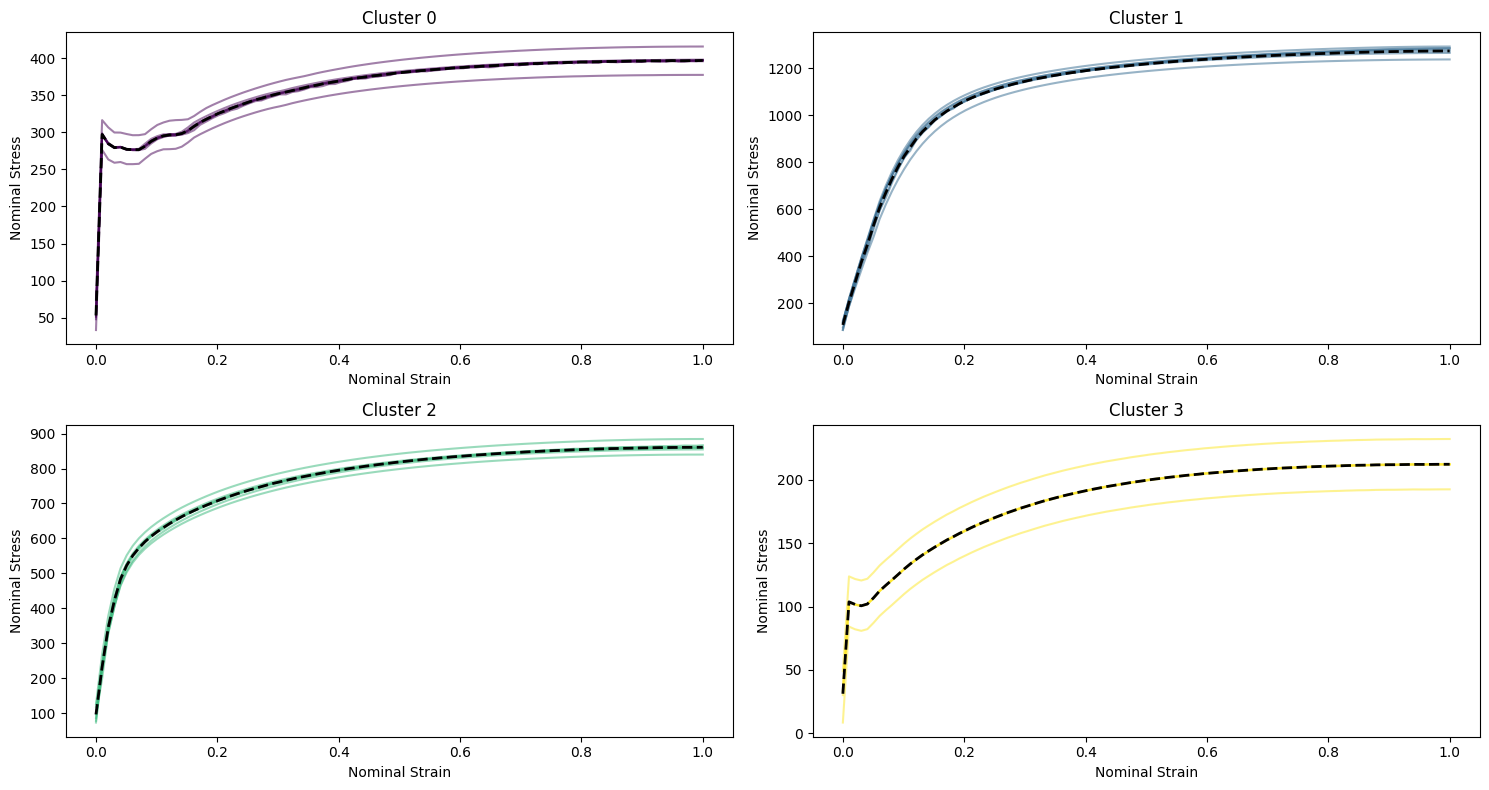

In [ ]:
import numpy as np
import pandas as pd
import os
from scipy.interpolate import interp1d
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

def preprocess_waveform_non_normalized(df, target_length=100):
    x = df['Nominal strain'].values
    y = df['Nominal stress'].values

    if len(x) < 2 or len(y) < 2:
        raise ValueError("Insufficient data points for interpolation.")

    x_unique, x_indices = np.unique(x, return_index=True)
    y_unique = y[x_indices]

    try:
        # TSとuElの計算
        max_stress_idx = np.argmax(y_unique)
        TS = y_unique[max_stress_idx]
        uEl = x_unique[max_stress_idx]

        # 波形の切り出し（ただし、正規化はしない）
        x_segment = x_unique[:max_stress_idx + 1]
        y_segment = y_unique[:max_stress_idx + 1]

        # リサンプリング
        f = interp1d(x_segment, y_segment, kind='linear', fill_value="extrapolate", bounds_error=False)
        x_new = np.linspace(min(x_segment), max(x_segment), target_length)
        y_new = f(x_new)

    except Exception as e:
        print(f"Error processing waveform data: {e}")
        y_new = np.zeros(target_length)

    return y_new, TS, uEl

def load_and_process_data_non_normalized(data_folder, target_length=100):
    processed_data = []
    ts_values = []
    uel_values = []
    filenames = []
    for filename in os.listdir(data_folder):
        if filename.endswith('.csv'):
            filepath = os.path.join(data_folder, filename)
            df = pd.read_csv(filepath)
            if 'Nominal strain' not in df.columns or 'Nominal stress' not in df.columns:
                raise KeyError(f"'Nominal strain' or 'Nominal stress' not found in {filename}")
            df = df.dropna()
            processed_wave, TS, uEl = preprocess_waveform_non_normalized(df, target_length)
            processed_data.append(processed_wave)
            ts_values.append(TS)
            uel_values.append(uEl)
            filenames.append(filename)
    return np.array(processed_data), np.array(ts_values), np.array(uel_values), filenames

def plot_clusters_non_normalized(data, labels, centers, filenames):
    n_clusters = len(np.unique(labels))
    fig, axes = plt.subplots(2, (n_clusters + 1) // 2, figsize=(15, 8))
    axes = axes.ravel()
    colors = plt.cm.viridis(np.linspace(0, 1, n_clusters))

    for i in range(n_clusters):
        cluster_data = data[labels == i]
        for wave in cluster_data:
            axes[i].plot(np.linspace(0, 1, len(wave)), wave, alpha=0.5, color=colors[i])
        axes[i].plot(np.linspace(0, 1, len(centers[i])), centers[i], linewidth=2, color='black', linestyle='--')
        axes[i].set_title(f'Cluster {i}')
        axes[i].set_xlabel('Nominal Strain')
        axes[i].set_ylabel('Nominal Stress')

    plt.tight_layout()
    plt.show()

def main_clustering_non_normalized():
    data_folder = '/content/drive/MyDrive/forecast_LSTM'
    target_length = 100
    processed_data, ts_values, uel_values, filenames = load_and_process_data_non_normalized(data_folder, target_length)

    n_clusters = 4
    kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
    labels = kmeans.fit_predict(processed_data)
    centers = kmeans.cluster_centers_

    plot_clusters_non_normalized(processed_data, labels, centers, filenames)

    return centers, ts_values, uel_values, labels, filenames

# 実行
centers, ts_values, uel_values, labels, filenames = main_clustering_non_normalized()

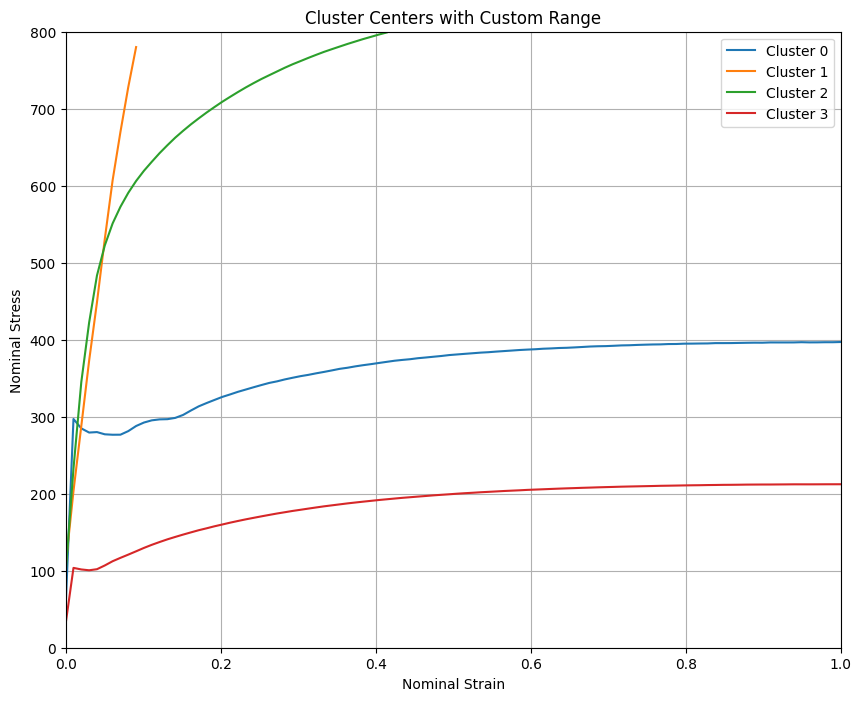

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def plot_centers_with_custom_range(centers, strain_max_limit=0.01, stress_max_limit=800):
    """
    クラスタリングの中心波形を表示し、範囲を調整可能にする関数。

    Args:
        centers (numpy.ndarray): クラスタの中心波形。
        strain_max_limit (float): 横軸（Nominal Strain）の最大値。
        stress_max_limit (float): 縦軸（Nominal Stress）の最大値。
    """
    plt.figure(figsize=(10, 8))
    n_centers = centers.shape[0]

    # 各クラスタの中心波形を描画
    for i, center in enumerate(centers):
        nominal_strain = np.linspace(0, 1, len(center))
        nominal_stress = center

        # 指定した範囲内のデータのみプロット
        mask = (nominal_strain <= strain_max_limit) & (nominal_stress <= stress_max_limit)
        plt.plot(nominal_strain[mask], nominal_stress[mask], label=f'Cluster {i}')

    plt.xlim(0, strain_max_limit)
    plt.ylim(0, stress_max_limit)
    plt.xlabel('Nominal Strain')
    plt.ylabel('Nominal Stress')
    plt.title('Cluster Centers with Custom Range')
    plt.legend()
    plt.grid(True)
    plt.show()

# 実行
strain_max_limit = 1.0  # 任意の横軸範囲
stress_max_limit = 800   # 任意の縦軸範囲
plot_centers_with_custom_range(centers, strain_max_limit, stress_max_limit)


Original (first 5): [ 53.05444607 297.06844186 284.83334193 279.44817533 280.04594813]
Reconstructed (first 5): [ 51.21148643 198.33556298 213.2035039  224.83718962 236.88901305]
Difference: 151.23929808825716
Original (first 5): [107.10895605 203.48895055 287.97899116 372.91103959 448.54915426]
Reconstructed (first 5): [114.71443501 231.63564292 340.52679536 435.54516784 516.72185555]
Difference: 161.093393018134
Original (first 5): [ 96.70276995 232.70908719 345.06343842 422.30933952 483.38389107]
Reconstructed (first 5): [ 84.88240976 215.99213584 280.71364132 336.56006767 385.2637011 ]
Difference: 229.08762865219956
Original (first 5): [ 31.12754293 103.67732825 101.64936381 100.57130438 101.97699994]
Reconstructed (first 5): [ 37.1853838  190.9804661  185.08119473 178.2974337  175.0814237 ]
Difference: 195.53579640655414


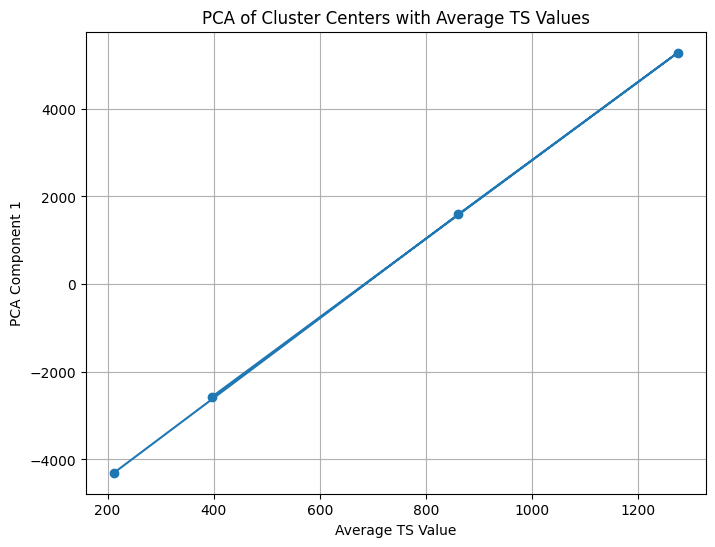

PCA1の回帰式: PCA1 = -0.009348321883462019 * TS^2 + 1.0025556892540655 * TS + 0.009348321883462076


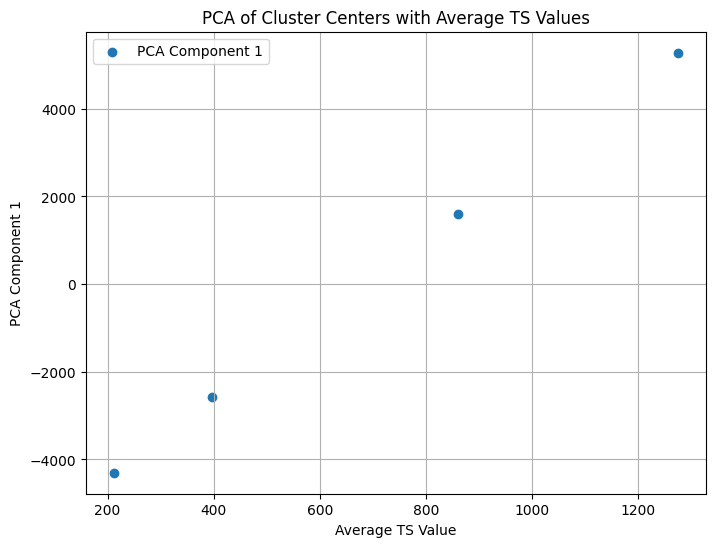

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
import pickle

# 前のセルからcenters, ts_values, labelsを受け取る
# ts_centersの計算
ts_centers = np.array([np.mean(ts_values[labels == i]) if any(labels == i) else np.nan for i in range(len(centers))])
valid_indices = ~np.isnan(ts_centers)
ts_centers = ts_centers[valid_indices]
centers = centers[valid_indices]

def apply_pca(centers):
    pca = PCA(n_components=1)
    pca_transformed_centers = pca.fit_transform(centers)
    return pca_transformed_centers, pca

def perform_polynomial_regression(ts_values, pca_coord, degree=2):
    model = Pipeline([
        ('poly', PolynomialFeatures(degree=degree)),
        ('linear', LinearRegression())
    ])
    model.fit(ts_values.reshape(-1, 1), pca_coord)
    return model

def reverse_pca_check(pca_model, pca_coords, original_data):
    reconstructed_data = pca_model.inverse_transform(pca_coords)
    for i, (original, reconstructed) in enumerate(zip(original_data, reconstructed_data)):
        print(f"Original (first 5): {original[:5]}")
        print(f"Reconstructed (first 5): {reconstructed[:5]}")
        print(f"Difference: {np.linalg.norm(original - reconstructed)}")
        print("=" * 50)

# PCAの適用
pca_coords, pca_model = apply_pca(centers)

# PCAの可逆性チェック
reverse_pca_check(pca_model, pca_coords, centers)

# PCAの可視化
plt.figure(figsize=(8, 6))
plt.plot(ts_centers, pca_coords, 'o-', label='PCA Component 1')
plt.xlabel('Average TS Value')
plt.ylabel('PCA Component 1')
plt.title('PCA of Cluster Centers with Average TS Values')
plt.grid(True)
plt.show()

# スケーリングの準備
ts_scaler = StandardScaler()
ts_centers_scaled = ts_scaler.fit_transform(ts_centers.reshape(-1, 1))

# PCAスケーリング用
pca_scaler = StandardScaler()
pca_coords_scaled = pca_scaler.fit_transform(pca_coords)

# 回帰の実行
model_pca1_poly = perform_polynomial_regression(ts_centers_scaled.flatten(), pca_coords_scaled.flatten(), degree=2)

# モデルとスケーラーの保存
with open('pca_model.pkl', 'wb') as f:
    pickle.dump(pca_model, f)
with open('scaler_ts.pkl', 'wb') as f:
    pickle.dump(ts_scaler, f)
with open('scaler_pca.pkl', 'wb') as f:
    pickle.dump(pca_scaler, f)
with open('model_pca1_poly.pkl', 'wb') as f:
    pickle.dump(model_pca1_poly, f)

# 回帰式の表示
coefs = model_pca1_poly.named_steps['linear'].coef_
intercept = model_pca1_poly.named_steps['linear'].intercept_
print(f"PCA1の回帰式: PCA1 = {coefs[2]} * TS^2 + {coefs[1]} * TS + {intercept}")

# 可視化
plt.figure(figsize=(8, 6))
plt.scatter(ts_centers, pca_coords, label='PCA Component 1')
plt.xlabel('Average TS Value')
plt.ylabel('PCA Component 1')
plt.title('PCA of Cluster Centers with Average TS Values')
plt.grid(True)
plt.legend()
plt.show()

Original (first 5): [ 53.05444607 297.06844186 284.83334193 279.44817533 280.04594813]
Reconstructed (first 5): [ 51.21148643 198.33556298 213.2035039  224.83718962 236.88901305]
Difference: 151.23929808825716
Original (first 5): [107.10895605 203.48895055 287.97899116 372.91103959 448.54915426]
Reconstructed (first 5): [114.71443501 231.63564292 340.52679536 435.54516784 516.72185555]
Difference: 161.093393018134
Original (first 5): [ 96.70276995 232.70908719 345.06343842 422.30933952 483.38389107]
Reconstructed (first 5): [ 84.88240976 215.99213584 280.71364132 336.56006767 385.2637011 ]
Difference: 229.08762865219956
Original (first 5): [ 31.12754293 103.67732825 101.64936381 100.57130438 101.97699994]
Reconstructed (first 5): [ 37.1853838  190.9804661  185.08119473 178.2974337  175.0814237 ]
Difference: 195.53579640655414


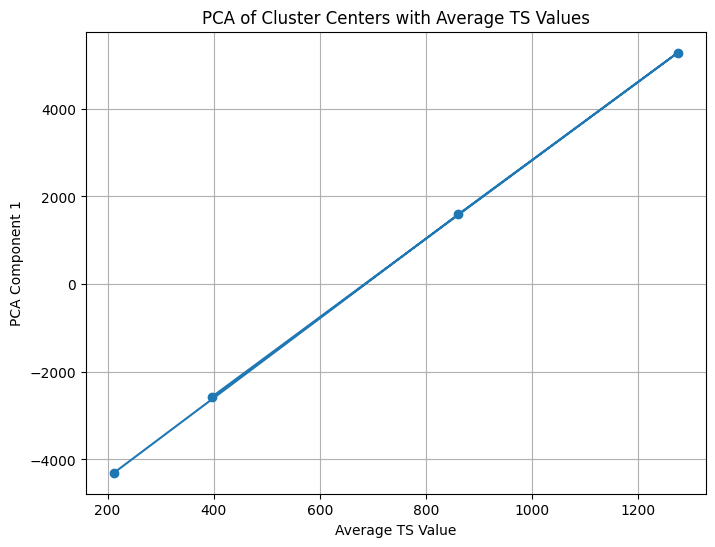

PCA1の回帰式: PCA1 = -0.009348321883462019 * TS^2 + 1.0025556892540655 * TS + 0.009348321883462076


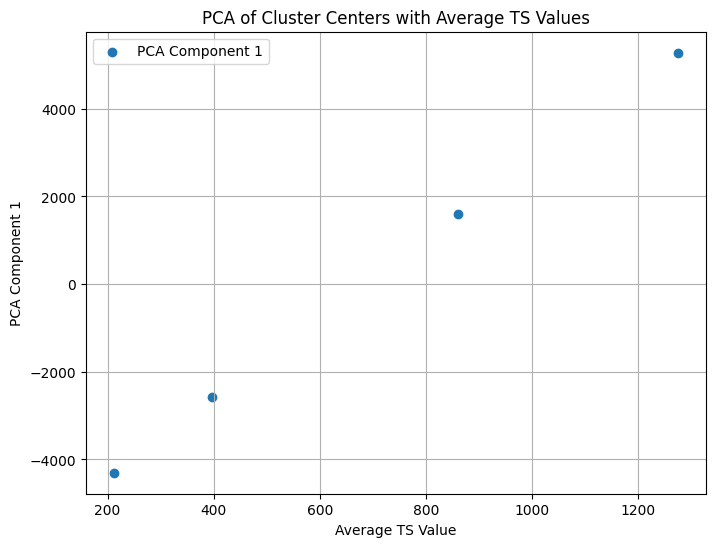

PCA1の回帰式: PCA1 = -0.009348321883462019 * TS^2 + 1.0025556892540655 * TS + 0.009348321883462076
Regression equation saved to pca_equation.csv
Results saved to pca_results.csv


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
import pickle
import pandas as pd

# セル1からcenters, ts_values, labelsを受け取る
# ts_centersの計算
ts_centers = np.array([np.mean(ts_values[labels == i]) if any(labels == i) else np.nan for i in range(len(centers))])
valid_indices = ~np.isnan(ts_centers)
ts_centers = ts_centers[valid_indices]
centers = centers[valid_indices]

def apply_pca(centers):
    pca = PCA(n_components=1)
    pca_transformed_centers = pca.fit_transform(centers)
    return pca_transformed_centers, pca

def perform_polynomial_regression(ts_values, pca_coord, degree=2):
    model = Pipeline([
        ('poly', PolynomialFeatures(degree=degree)),
        ('linear', LinearRegression())
    ])
    model.fit(ts_values.reshape(-1, 1), pca_coord)
    return model

def reverse_pca_check(pca_model, pca_coords, original_data):
    reconstructed_data = pca_model.inverse_transform(pca_coords)
    for i, (original, reconstructed) in enumerate(zip(original_data, reconstructed_data)):
        print(f"Original (first 5): {original[:5]}")
        print(f"Reconstructed (first 5): {reconstructed[:5]}")
        print(f"Difference: {np.linalg.norm(original - reconstructed)}")
        print("=" * 50)

# PCAの適用
pca_coords, pca_model = apply_pca(centers)

# PCAの可逆性チェック
reverse_pca_check(pca_model, pca_coords, centers)

# PCAの可視化
plt.figure(figsize=(8, 6))
plt.plot(ts_centers, pca_coords, 'o-', label='PCA Component 1')
plt.xlabel('Average TS Value')
plt.ylabel('PCA Component 1')
plt.title('PCA of Cluster Centers with Average TS Values')
plt.grid(True)
plt.show()

# スケーリングの準備
ts_scaler = StandardScaler()
ts_centers_scaled = ts_scaler.fit_transform(ts_centers.reshape(-1, 1))

# PCAスケーリング用
pca_scaler = StandardScaler()
pca_coords_scaled = pca_scaler.fit_transform(pca_coords)

# 回帰の実行
model_pca1_poly = perform_polynomial_regression(ts_centers_scaled.flatten(), pca_coords_scaled.flatten(), degree=2)

# モデルとスケーラーの保存
with open('pca_model.pkl', 'wb') as f:
    pickle.dump(pca_model, f)
with open('scaler_ts.pkl', 'wb') as f:
    pickle.dump(ts_scaler, f)
with open('scaler_pca.pkl', 'wb') as f:
    pickle.dump(pca_scaler, f)
with open('model_pca1_poly.pkl', 'wb') as f:
    pickle.dump(model_pca1_poly, f)

# 回帰式の表示
coefs = model_pca1_poly.named_steps['linear'].coef_
intercept = model_pca1_poly.named_steps['linear'].intercept_
print(f"PCA1の回帰式: PCA1 = {coefs[2]} * TS^2 + {coefs[1]} * TS + {intercept}")

# 可視化
plt.figure(figsize=(8, 6))
plt.scatter(ts_centers, pca_coords, label='PCA Component 1')
plt.xlabel('Average TS Value')
plt.ylabel('PCA Component 1')
plt.title('PCA of Cluster Centers with Average TS Values')
plt.grid(True)
plt.legend()
plt.show()

# CSV出力
df = pd.DataFrame({'TS_Centers': ts_centers, 'PCA_Coords': pca_coords.flatten()})
df.to_csv('pca_results.csv', index=False)

# 回帰式の表示とCSV出力
coefs = model_pca1_poly.named_steps['linear'].coef_
intercept = model_pca1_poly.named_steps['linear'].intercept_
equation = f"PCA1 = {coefs[2]} * TS^2 + {coefs[1]} * TS + {intercept}"
print(f"PCA1の回帰式: {equation}")

import pandas as pd
df_equation = pd.DataFrame({'Equation': [equation]})
df_equation.to_csv('pca_equation.csv', index=False)

print("Regression equation saved to pca_equation.csv")

print("Results saved to pca_results.csv")

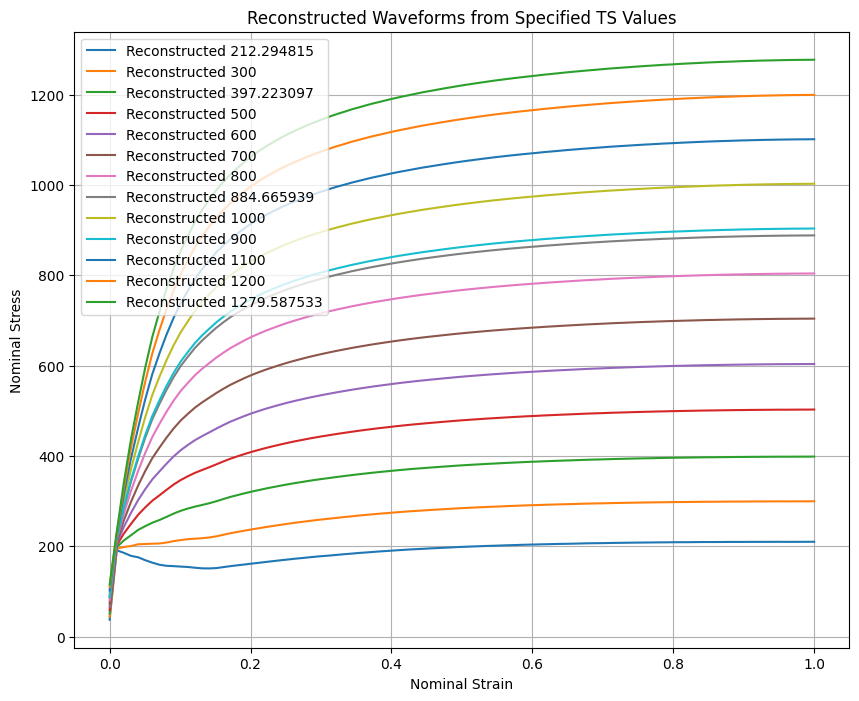

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pickle

# TS値をロード
ts_values = [212.294815, 300, 397.223097, 500, 600, 700, 800, 884.665939, 1000, 900, 1100, 1200, 1279.587533]

# 保存されたモデルとスケーラーをロード
with open('pca_model.pkl', 'rb') as f:
    pca_model = pickle.load(f)
with open('scaler_ts.pkl', 'rb') as f:
    ts_scaler = pickle.load(f)
with open('scaler_pca.pkl', 'rb') as f:
    pca_scaler = pickle.load(f)
with open('model_pca1_poly.pkl', 'rb') as f:
    model_pca1_poly = pickle.load(f)

# TS値を標準化
ts_scaled = ts_scaler.transform(np.array(ts_values).reshape(-1, 1)).flatten()

# 波形生成関数
def generate_waveform_from_real_ts(real_ts_value):
    real_ts_scaled = ts_scaler.transform([[real_ts_value]])[0][0]
    predicted_pca1_scaled = model_pca1_poly.predict([[real_ts_scaled]])
    predicted_pca1 = pca_scaler.inverse_transform(predicted_pca1_scaled.reshape(-1, 1))
    reconstructed_waveform = pca_model.inverse_transform(predicted_pca1)
    return reconstructed_waveform[0]

# 可視化関数
def plot_multiple_waveforms(ts_values):
    plt.figure(figsize=(10, 8))
    x = np.linspace(0, 1, 100)

    for ts_value in ts_values:
        reconstructed_waveform = generate_waveform_from_real_ts(ts_value)
        plt.plot(x, reconstructed_waveform, label=f'Reconstructed {ts_value}')

    plt.xlabel('Nominal Strain')
    plt.ylabel('Nominal Stress')
    plt.title('Reconstructed Waveforms from Specified TS Values')
    plt.legend()
    plt.grid(True)
    plt.show()

# 実行
plot_multiple_waveforms(ts_values)

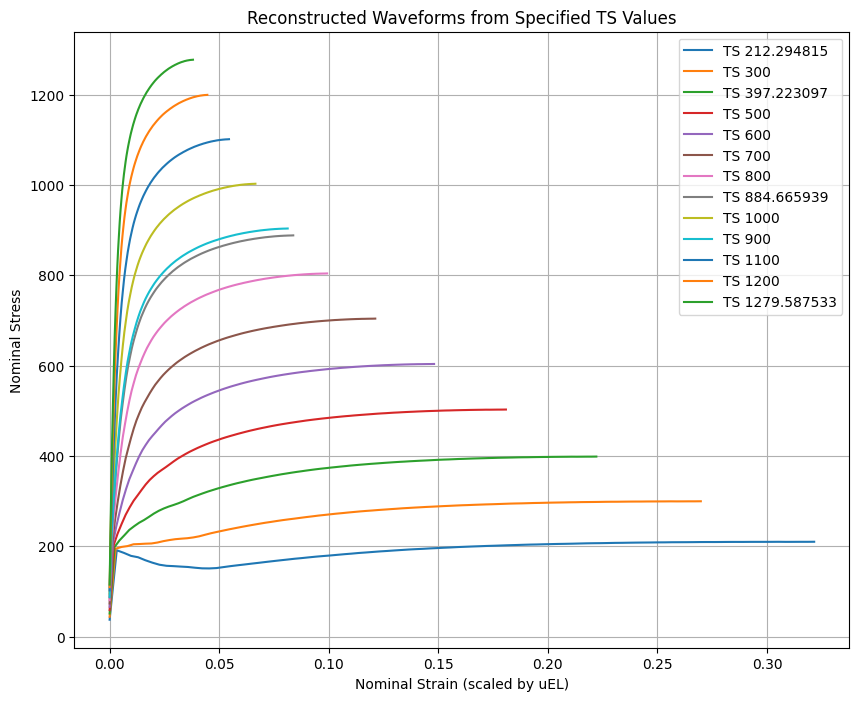

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pickle
import pandas as pd
import os

# 出力フォルダを指定
output_folder = "/content/drive/MyDrive/program/waveform_outputs"
os.makedirs(output_folder, exist_ok=True)

# TS値を定義
ts_values = [212.294815, 300, 397.223097, 500, 600, 700, 800, 884.665939, 1000, 900, 1100, 1200, 1279.587533]

# 保存されたモデルとスケーラーをロード
with open('pca_model.pkl', 'rb') as f:
    pca_model = pickle.load(f)
with open('scaler_ts.pkl', 'rb') as f:
    ts_scaler = pickle.load(f)
with open('scaler_pca.pkl', 'rb') as f:
    pca_scaler = pickle.load(f)
with open('model_pca1_poly.pkl', 'rb') as f:
    model_pca1_poly = pickle.load(f)

# uEL計算関数（指数関数）
def calculate_uEL(ts_value):
    return 0.4916 * np.exp(-0.002 * ts_value)

# 波形生成関数
def generate_waveform_from_real_ts(real_ts_value):
    real_ts_scaled = ts_scaler.transform([[real_ts_value]])[0][0]
    predicted_pca1_scaled = model_pca1_poly.predict([[real_ts_scaled]])
    predicted_pca1 = pca_scaler.inverse_transform(predicted_pca1_scaled.reshape(-1, 1))
    reconstructed_waveform = pca_model.inverse_transform(predicted_pca1)
    return reconstructed_waveform[0]

# 波形を可視化しCSV保存
def plot_and_save_waveforms(ts_values, target_length=100):
    plt.figure(figsize=(10, 8))
    nominal_strain = np.linspace(0, 1, target_length)

    for ts_value in ts_values:
        reconstructed_waveform = generate_waveform_from_real_ts(ts_value)
        uEL = calculate_uEL(ts_value)
        adjusted_strain = nominal_strain * uEL
        plt.plot(adjusted_strain, reconstructed_waveform, label=f'TS {ts_value}')

        filename = os.path.join(output_folder, f'waveform_TS_{int(ts_value)}.csv')
        df = pd.DataFrame({'Nominal Strain (scaled by uEL)': adjusted_strain, 'Nominal Stress': reconstructed_waveform})
        df.to_csv(filename, index=False)

    plt.xlabel('Nominal Strain (scaled by uEL)')
    plt.ylabel('Nominal Stress')
    plt.title('Reconstructed Waveforms from Specified TS Values')
    plt.legend()
    plt.grid(True)
    plt.show()

# 実行
plot_and_save_waveforms(ts_values)


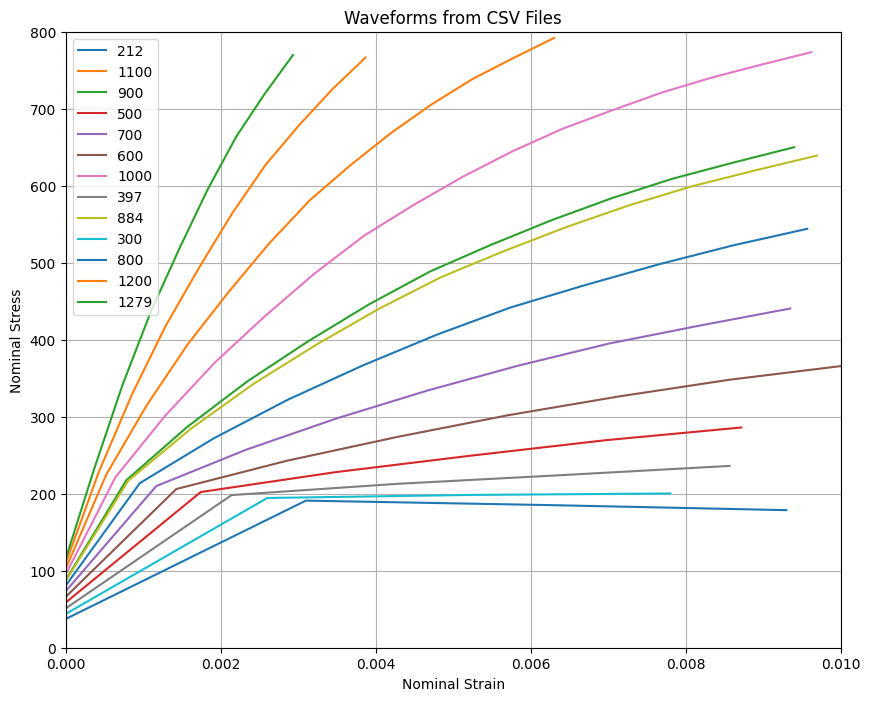

In [ ]:
import os
import pandas as pd
import matplotlib.pyplot as plt

# 保存されたファイルのパス
output_folder = "/content/drive/MyDrive/program/waveform_outputs"

# 表示範囲を指定（例: strain_max_limit = 0.5, stress_max_limit = 1200）
strain_max_limit = 0.01
stress_max_limit = 800

def plot_waveforms_from_csv(folder_path, strain_max_limit, stress_max_limit):
    plt.figure(figsize=(10, 8))
    csv_files = [f for f in os.listdir(folder_path) if f.endswith('.csv')]

    for file in csv_files:
        file_path = os.path.join(folder_path, file)
        data = pd.read_csv(file_path)

        nominal_strain = data['Nominal Strain (scaled by uEL)']
        nominal_stress = data['Nominal Stress']

        # 範囲内のデータのみプロット
        mask = (nominal_strain <= strain_max_limit) & (nominal_stress <= stress_max_limit)
        plt.plot(nominal_strain[mask], nominal_stress[mask], label=f'{file.split("_")[-1].split(".")[0]}')

    plt.xlim(0, strain_max_limit)
    plt.ylim(0, stress_max_limit)
    plt.xlabel('Nominal Strain')
    plt.ylabel('Nominal Stress')
    plt.title('Waveforms from CSV Files')
    plt.legend()
    plt.grid(True)
    plt.show()

# 実行
plot_waveforms_from_csv(output_folder, strain_max_limit, stress_max_limit)


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

修正前

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures #多項式特徴量生成用
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline #パイプライン用
import pickle

# セル1からcenters, ts_values, labelsを受け取ることを前提とする

# ts_centers: 各クラスタのTS平均値を計算（仮定。実際の`ts_values`から算出）
ts_centers = np.array([np.mean(ts_values[labels == i]) if any(labels == i) else np.nan for i in range(len(centers))])
ts_centers = ts_centers[~np.isnan(ts_centers)] # nanを除外
centers = centers[~np.isnan(ts_centers)] # 対応するcenterも除外

def apply_pca(centers):
    pca = PCA(n_components=1)
    pca_transformed_centers = pca.fit_transform(centers)
    return pca_transformed_centers, pca

def perform_polynomial_regression(ts_values, pca_coord, degree=2): #多項式回帰を行う関数
    model = Pipeline([
        ('poly', PolynomialFeatures(degree=degree)), #多項式特徴量を生成
        ('linear', LinearRegression()) #線形回帰モデル
    ])
    model.fit(ts_values.reshape(-1, 1), pca_coord)
    return model

def reverse_pca_check(pca_model, pca_coords, original_data):
    reconstructed_data = pca_model.inverse_transform(pca_coords)
    for i, (original, reconstructed) in enumerate(zip(original_data, reconstructed_data)):
        print(f"Original (first 5): {original[:5]}")
        print(f"Reconstructed (first 5): {reconstructed[:5]}")
        print(f"Difference: {np.linalg.norm(original - reconstructed)}")
        print("=" * 50)

# PCAの可視化 (1次元なので折れ線グラフ)
    plt.figure(figsize=(8, 6))
    plt.plot(ts_centers, pca_coords, 'o-', label='PCA Component 1')
    plt.xlabel('Average TS Value')
    plt.ylabel('PCA Component 1')
    plt.title('PCA of Cluster Centers with Average TS Values')
    plt.grid(True)
    plt.show()

# クラスタリング結果から得られたクラスタ中心の座標に基づいてPCAを適用
pca_coords, pca_model = apply_pca(centers)

# PCAの可逆性チェック
reverse_pca_check(pca_model, pca_coords, centers)

# pca_coordsを標準化
scaler = StandardScaler()
pca_coords_scaled = scaler.fit_transform(pca_coords)

# ts_centersのスケール用scalerオブジェクト
scaler = StandardScaler()
ts_centers_scaled = scaler.fit_transform(ts_centers.reshape(-1, 1))

# スケーリングしたts_centersで回帰
model_pca1_poly = perform_polynomial_regression(ts_centers_scaled.flatten(), pca_coords_scaled[:, 0], degree=2)

# StandardScalerを保存
with open('scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)

# PCA1, PCA2をTSで説明する回帰（多項式回帰に変更）
#model_pca1_poly = perform_polynomial_regression(ts_centers, pca_coords_scaled[:, 0], degree=2)  # 2次式で回帰

# PCAモデルと必要なデータを保存
#with open('pca_model.pkl', 'wb') as f:
#    pickle.dump(pca_model, f)
#with open('pca_coords.pkl', 'wb') as f:
#    pickle.dump(pca_coords, f)
#with open('ts_centers.pkl', 'wb') as f:
#    pickle.dump(ts_centers, f)

# 回帰式の表示
print(f"PCA1の回帰式: PCA1 = {model_pca1_poly.named_steps['linear'].coef_} * TS^2 + {model_pca1_poly.named_steps['linear'].coef_[0]} * TS + {model_pca1_poly.named_steps['linear'].intercept_}")

# 可視化
plt.figure(figsize=(8, 6))
plt.scatter(ts_centers, pca_coords, label='PCA Component 1') # ts_centersとpca_coordsをプロット
plt.xlabel('Average TS Value')
plt.ylabel('PCA Component 1')
plt.title('PCA of Cluster Centers with Average TS Values')
plt.grid(True)
plt.legend()
plt.show()

NameError: name 'centers' is not defined

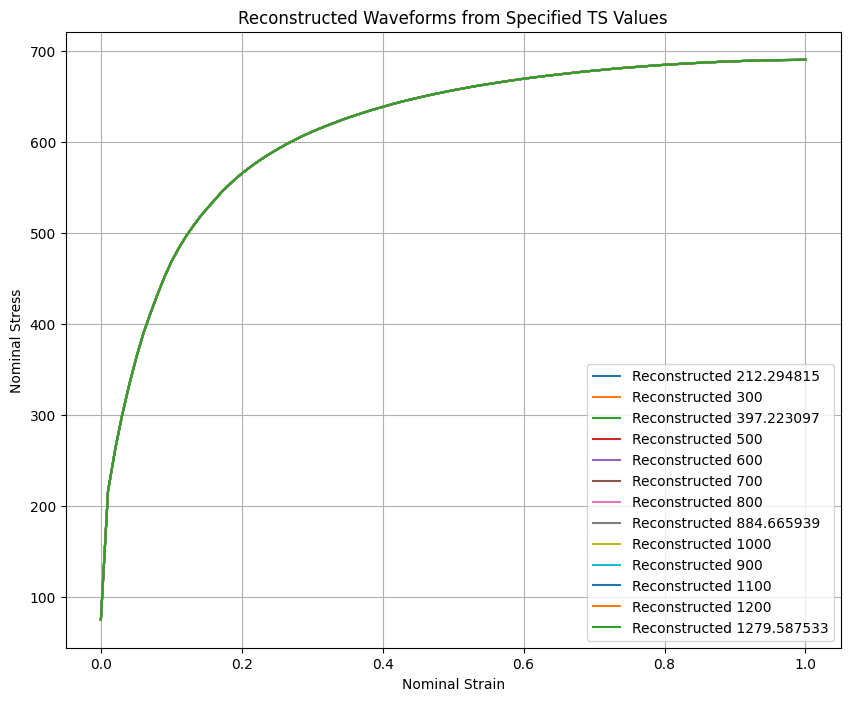

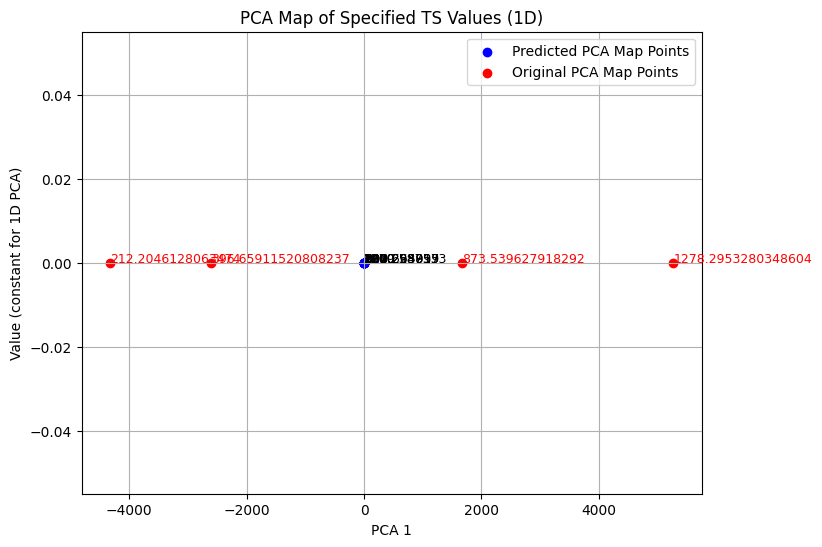

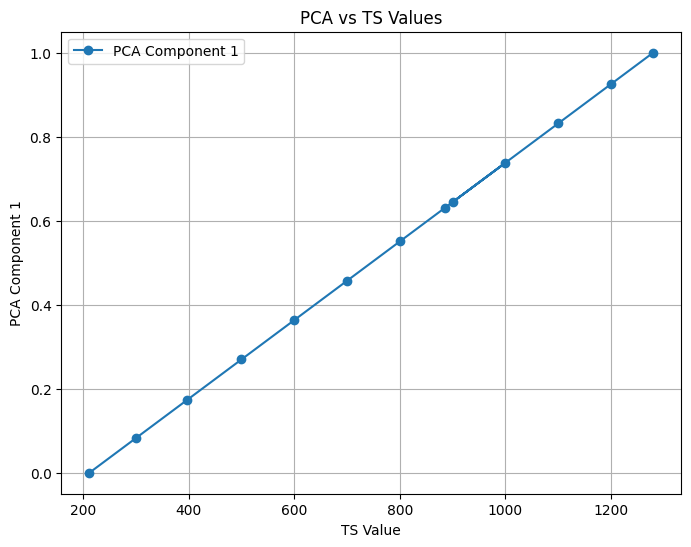

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pickle
from sklearn.preprocessing import StandardScaler

# TS値を標準化するためのスケーラーの初期化と適用
ts_values = [212.294815, 300, 397.223097, 500, 600, 700, 800, 884.665939, 1000, 900, 1100, 1200, 1279.587533]
scaler = StandardScaler()
ts_scaled = scaler.fit_transform(np.array(ts_values).reshape(-1, 1)).flatten()  # fit_transformでスケール変換

# セル②で保存した PCAモデルとデータをロード
#with open('pca_model.pkl', 'rb') as f:
#    pca_model = pickle.load(f)
#with open('pca_coords.pkl', 'rb') as f:
#    pca_coords = pickle.load(f)
#with open('ts_centers.pkl', 'rb') as f:
#    ts_centers = pickle.load(f)

# セル2で保存したscalerをロード
with open('scaler.pkl', 'rb') as f:
    scaler = pickle.load(f)

# TS値をセル2と同じスケールで標準化
ts_scaled = scaler.transform(np.array(ts_values).reshape(-1, 1)).flatten()

# TSとPCAの関係を使用して波形を生成
def generate_waveform_from_real_ts(real_ts_value, model_pca1, pca_model):
    real_ts_scaled = scaler.transform([[real_ts_value]])[0][0]  # セル2のスケールを適用
    predicted_pca1 = model_pca1.predict([[real_ts_scaled]])
    predicted_pca_coords = np.array([[predicted_pca1[0]]])

    reconstructed_waveform = pca_model.inverse_transform(predicted_pca_coords)
    return reconstructed_waveform[0], predicted_pca_coords[0]

# 実際のTS値から再構築された波形を生成する関数
#def generate_waveform_from_real_ts(real_ts_value, model_pca1, pca_model):
#    real_ts_scaled = scaler.transform([[real_ts_value]])[0][0]  # TS値の標準化
#    predicted_pca1 = model_pca1.predict([[real_ts_scaled]])
#    predicted_pca_coords = np.array([[predicted_pca1[0]]])

#    reconstructed_waveform = pca_model.inverse_transform(predicted_pca_coords)
#    return reconstructed_waveform[0], predicted_pca_coords[0]

# 再構築された波形を可視化する関数
def plot_multiple_waveforms(ts_values, model_pca1, pca_model, target_length=100):
    plt.figure(figsize=(10, 8))
    x = np.linspace(0, 1, target_length)

    for ts_value in ts_values:
        reconstructed_waveform, _ = generate_waveform_from_real_ts(ts_value, model_pca1, pca_model)
        plt.plot(x, reconstructed_waveform, label=f'Reconstructed {ts_value}')

    plt.xlabel('Nominal Strain')
    plt.ylabel('Nominal Stress')
    plt.title('Reconstructed Waveforms from Specified TS Values')
    plt.legend()
    plt.grid(True)
    plt.show()

# PCAマップを可視化する関数
def plot_pca_map(ts_values, model_pca1, pca_model, pca_coords_original, ts_centers):
    pca_coords = [generate_waveform_from_real_ts(ts_value, model_pca1, pca_model)[1] for ts_value in ts_values]
    pca_coords = np.array(pca_coords)

    plt.figure(figsize=(8, 6))
    plt.scatter(pca_coords[:, 0], np.zeros_like(pca_coords[:, 0]), c='b', label='Predicted PCA Map Points')
    plt.scatter(pca_coords_original[:, 0], np.zeros_like(pca_coords_original[:, 0]), c='r', label='Original PCA Map Points')
    for i, ts_value in enumerate(ts_values):
        plt.text(pca_coords[i, 0], 0, str(ts_value), fontsize=9)
    for i, ts_value in enumerate(ts_centers):
        plt.text(pca_coords_original[i, 0], 0, str(ts_value), fontsize=9, color='r')
    plt.xlabel('PCA 1')
    plt.ylabel('Value (constant for 1D PCA)')
    plt.title('PCA Map of Specified TS Values (1D)')
    plt.grid(True)
    plt.legend()
    plt.show()

# TSとPCAの関係を可視化する
def plot_ts_vs_pca(ts_values, model_pca1):
    ts_scaled = scaler.transform(np.array(ts_values).reshape(-1, 1)).flatten()
    predicted_pca1 = [model_pca1.predict([[ts]])[0] for ts in ts_scaled]
    predicted_pca1_rescaled = (predicted_pca1 - np.min(predicted_pca1)) / (np.max(predicted_pca1) - np.min(predicted_pca1))  # レンジを揃える
    plt.figure(figsize=(8, 6))
    plt.plot(ts_values, predicted_pca1_rescaled, 'o-', label='PCA Component 1')
    plt.xlabel('TS Value')
    plt.ylabel('PCA Component 1')
    plt.title('PCA vs TS Values')
    plt.grid(True)
    plt.legend()
    plt.show()

# セル②で得られたscaler, pca_coords, ts_centers, model_pca1, pca_modelを渡す
plot_multiple_waveforms(ts_values, model_pca1_poly, pca_model)
plot_pca_map(ts_values, model_pca1_poly, pca_model, pca_coords, ts_centers)
plot_ts_vs_pca(ts_values, model_pca1_poly)